In [111]:
# Import Libraries
#Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
from numpy import median, mean ,sum


In [4]:
#Read the csv file with utf-8 decoding
dfcolraw = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/Colonoscopyrecords.csv')
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [33]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             41391 non-null  int64 
 1   Age            41391 non-null  int64 
 2   proceduredate  41391 non-null  object
 3   Gender         41391 non-null  object
 4   CLINICID       41391 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [12]:
dfcolraw.shape

(41391, 5)

In [27]:
dfcolavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()


In [28]:
dfcolavg=pd.DataFrame(dfcolavg)

In [30]:
dfcolavg

ID
Age proceduredate    
53  25/07/2018      1
57  29/04/2015      1
58  07/02/2018      1
59  02/03/2017      1
    09/07/2018      1
...                ..
79  29/01/2023      2
80  02/03/2023      1
    12/07/2023      1
    14/12/2022      1
    15/05/2023      1

[21268 rows x 1 columns]

In [54]:
dfcolage=dfcolraw.groupby(['Age'])['ID'].agg(["count"])

In [55]:
dfcolage.shape

(25, 1)

In [58]:
dfcolage.describe()

,count
count,25.000000
mean,1655.640000
std,1684.220168
min,1.000000
25%,62.000000
50%,927.000000
75%,3160.000000
max,4915.000000


In [73]:
dfcolage=pd.DataFrame(dfcolage).reset_index()

In [74]:
dfcolage

,Age,count
0,53,1
1,57,1
2,58,1
3,59,4
4,60,3160
5,61,1716
6,62,2571
7,63,3281
8,64,3121
9,65,3386


In [64]:
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


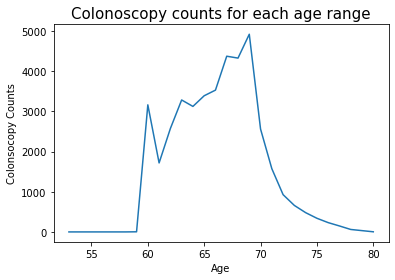

In [100]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = dfcolage['Age']
y = dfcolage['count']

plt.plot(x, y) # Plot the chart
plt.xlabel('Age')
plt.ylabel('Colonsocopy Counts')
plt.title('Colonoscopy counts for each age range', fontsize=15)

plt.show() # display

In [90]:
#Create dataframe for each date
dfcoldate=dfcolraw.groupby(['proceduredate'])['ID'].agg(["count"]).reset_index()

In [91]:
dfcoldate

,proceduredate,count
0,01/02/2016,19
1,01/02/2017,16
2,01/02/2018,17
3,01/02/2019,10
4,01/02/2021,7
...,...,...
2693,31/10/2017,18
2694,31/10/2018,17
2695,31/10/2019,21
2696,31/12/2018,2


In [97]:
#Create dataframe for each Unit
dfcolclinic=dfcolraw.groupby(['CLINICID','Age'])['ID'].agg(["count"]).reset_index()

In [98]:
dfcolclinic

,CLINICID,Age,count
0,1,60,477
1,1,61,226
2,1,62,285
3,1,63,512
4,1,64,400
...,...,...,...
319,24,76,11
320,24,77,9
321,24,78,1
322,24,79,5


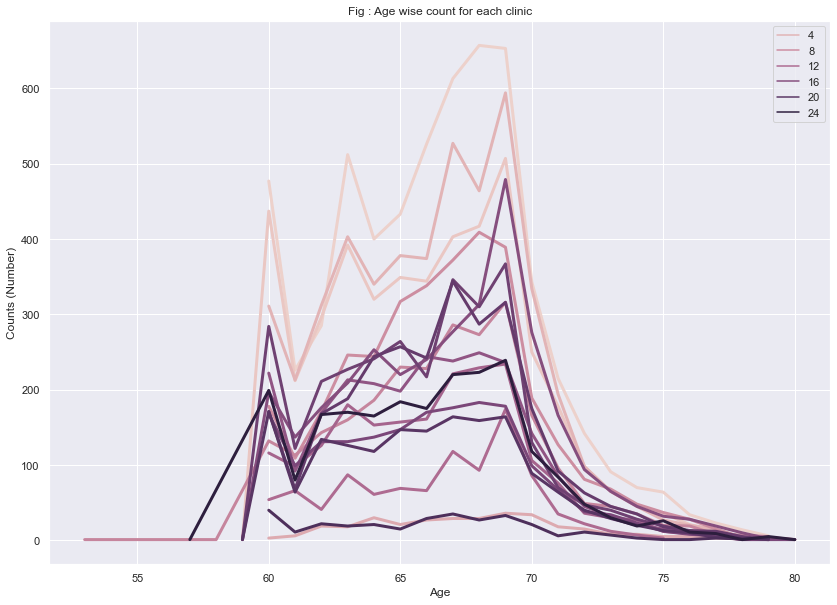

In [101]:
#Plot showing Yearly live stock for Ireland

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolclinic, x ='Age', y = 'count',
                  hue='CLINICID', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

Text(0.5, 1.0, 'Box plot Administration')

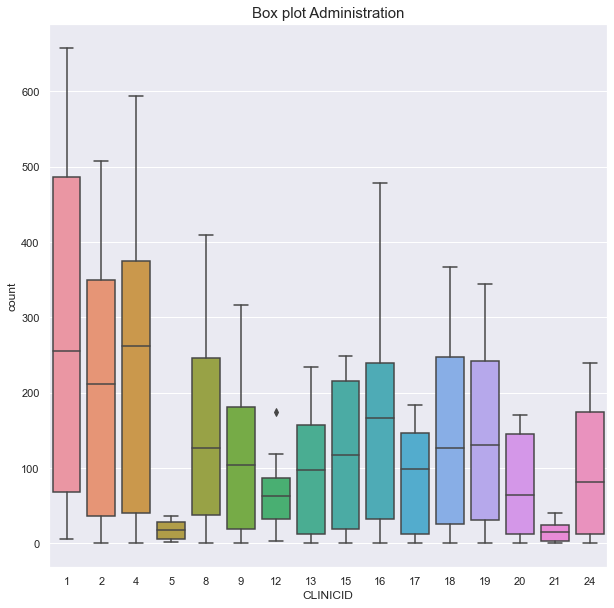

In [104]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

In [105]:
#Create dataframe for each Unit
dfcolclinicpd=dfcolraw.groupby(['CLINICID','Age','proceduredate'])['ID'].agg(["count"]).reset_index()
dfcolclinicpd

,CLINICID,Age,proceduredate,count
0,1,60,01/03/2017,2
1,1,60,01/04/2019,1
2,1,60,01/06/2017,1
3,1,60,01/06/2018,1
4,1,60,01/06/2021,1
...,...,...,...,...
35477,24,79,11/02/2023,2
35478,24,79,14/06/2023,1
35479,24,79,15/12/2022,1
35480,24,79,28/06/2023,1


In [107]:
dfcolclinicpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35482 entries, 0 to 35481
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CLINICID       35482 non-null  int64 
 1   Age            35482 non-null  int64 
 2   proceduredate  35482 non-null  object
 3   count          35482 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [112]:
dfcolclinicpd['proceduredate']=pd.to_datetime(dfcolclinicpd['proceduredate'])
dfcolclinicpd['proceduredate'] =pd.to_datetime(dfcolclinicpd['proceduredate'].dt.strftime('%d/%m/%Y'))


In [113]:
#Create a new column in dataframe that has the value of date and month combination
dfcolclinicpd['day'] = [x.day for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['month'] = [x.month for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['year'] = [x.year for x in dfcolclinicpd['proceduredate']]

# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,count,day,month,year
0,1,60,2017-01-03,2,3,1,2017
1,1,60,2019-01-04,1,4,1,2019
2,1,60,2017-01-06,1,6,1,2017
3,1,60,2018-01-06,1,6,1,2018
4,1,60,2021-01-06,1,6,1,2021


In [115]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolclinicpd['Monthname'] = dfcolclinicpd['month'].map(monthsmap)
# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,count,day,month,year,Monthname
0,1,60,2017-01-03,2,3,1,2017,Jan
1,1,60,2019-01-04,1,4,1,2019,Jan
2,1,60,2017-01-06,1,6,1,2017,Jan
3,1,60,2018-01-06,1,6,1,2018,Jan
4,1,60,2021-01-06,1,6,1,2021,Jan


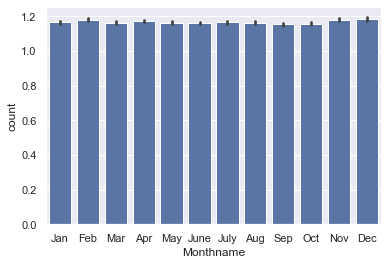

In [117]:
ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 